In [1]:
# magic    
get_ipython().run_line_magic('matplotlib', 'inline')
# run files
get_ipython().run_line_magic('run', '/srv/jhub/share/._Additions/Import_libs.py')
get_ipython().run_line_magic('run', '/srv/jhub/share/._Additions/Connecting_.py')
get_ipython().run_line_magic('run', '/srv/jhub/share/._Additions/my_script.py')
get_ipython().run_line_magic('run', '/srv/jhub/share/._Additions/Date_gen.py')
get_ipython().run_line_magic('run', '/srv/jhub/share/._Additions/xx.py')

# print
###########################
# print(
# df_test_xx.shape, '\n'
# ,abs_path, '\n' # abs_path - путь до шары (видна всем езерам - '/srv/jhub/share/')
# ,path_OUT_dbDATA, '\n'
# ,date_start, date_end, '\n'
# )
############################## End ##############################

# 370 ютм с рекламки
Вот ссылка для запросов: https://bitrix.e2e4online.ru/local/tools_web/plain_info_ad.php?from=dd.mm.yyyy&to=dd.mm.yyyy

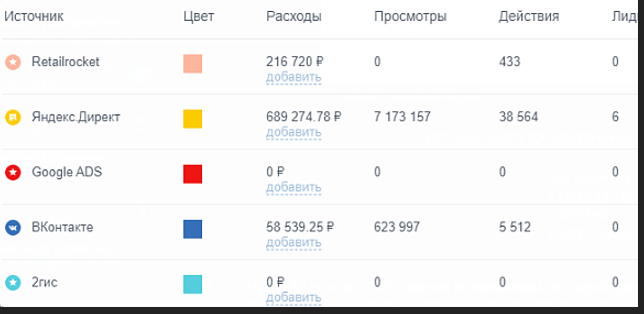

In [2]:
import pandas as pd
import os
import requests
import math


url_param = "https://bitrix.e2e4online.ru/local/tools_web/plain_info_ad.php?from=30.04.2022&to=30.05.2022" 

response = requests.get(url_param)
response.status_code

200

In [3]:
response.text # 'Get out!'

"{'from':'30.04.2022 00:00:00','to':'30.05.2022 23:59:59','result':{'currency':'RUB','currencyText':'','sources':{'15':{'code':'15','caption':'Google Ads','color':'#3889db','iconClass':'ui-icon ui-icon-service-google-ads','hasPathToList':true,'expensesReport':{'supported':true,'options':{'sourceId':'15','gridId':'crm-report-tracking-ad-le1','from':'30.04.2022','to':'30.05.2022'}}},'7':{'code':'7','caption':'ВКонтакте','color':'#3871ba','iconClass':'ui-icon ui-icon-service-vk','hasPathToList':true,'expensesReport':{'supported':false,'options':[]}},'5':{'code':'5','caption':'Яндекс.Директ','color':'#ffce00','iconClass':'ui-icon ui-icon-service-ya-direct','hasPathToList':true,'expensesReport':{'supported':false,'options':[]}},'0':{'code':'0','caption':'Прочий трафик','color':'','iconClass':'ui-icon ui-icon-service-organic','hasPathToList':true,'expensesReport':{'supported':false,'options':[]}},'4':{'code':'4','caption':'Retailrocket','color':'#ffb79f','iconClass':'ui-icon ui-icon-service-

In [4]:
response.content

b"{'from':'30.04.2022 00:00:00','to':'30.05.2022 23:59:59','result':{'currency':'RUB','currencyText':'','sources':{'15':{'code':'15','caption':'Google Ads','color':'#3889db','iconClass':'ui-icon ui-icon-service-google-ads','hasPathToList':true,'expensesReport':{'supported':true,'options':{'sourceId':'15','gridId':'crm-report-tracking-ad-le1','from':'30.04.2022','to':'30.05.2022'}}},'7':{'code':'7','caption':'\xd0\x92\xd0\x9a\xd0\xbe\xd0\xbd\xd1\x82\xd0\xb0\xd0\xba\xd1\x82\xd0\xb5','color':'#3871ba','iconClass':'ui-icon ui-icon-service-vk','hasPathToList':true,'expensesReport':{'supported':false,'options':[]}},'5':{'code':'5','caption':'\xd0\xaf\xd0\xbd\xd0\xb4\xd0\xb5\xd0\xba\xd1\x81.\xd0\x94\xd0\xb8\xd1\x80\xd0\xb5\xd0\xba\xd1\x82','color':'#ffce00','iconClass':'ui-icon ui-icon-service-ya-direct','hasPathToList':true,'expensesReport':{'supported':false,'options':[]}},'0':{'code':'0','caption':'\xd0\x9f\xd1\x80\xd0\xbe\xd1\x87\xd0\xb8\xd0\xb9 \xd1\x82\xd1\x80\xd0\xb0\xd1\x84\xd0\xb8\xd

In [5]:
response.json()

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

# fast-bitrix24 
https://pypi.org/project/fast-bitrix24/

In [ ]:
# from fast_bitrix24 import Bitrix

In [ ]:
# https://bitrix.e2e4online.ru/

In [ ]:
# try:
#     bx24.callMethod('tasks.task.add', fields={'TITLE': 'task for test', 'RESPONSIBLE_ID': 1})
# except BitrixError as message:
#     print(message)


In [1]:
# # замените на ваш вебхук для доступа к Bitrix24
# webhook = "https://bitrix.e2e4online.ru/rest/1765/dh4oo0c8zxoew3s6/"
# b = Bitrix(webhook)

In [7]:
# # список лидов
# leads = b.get_all('crm.lead.list')

In [20]:
# ,"select" : ['ID', 'UF_CRM_1644313996', 'UTM_SOURCE', 'UTM_MEDIUM', 'UTM_CAMPAIGN','UTM_CONTENT','UTM_TERM']
import pandas as pd
import os
import requests
import math

# method Константы CRM https://dev.1c-bitrix.ru/rest_help/crm/constants.php
method_name = "crm.deal.list" 
# Адрес api метода для запроса get 
url_param = "https://bitrix.e2e4online.ru/rest/1765/dh4oo0c8zxoew3s6/" + method_name

# BEGINDATE Дата создания ЗАКАЗА в АСУП это "Дата начала" в Битриксе. 
# DATE_CREATE Дата создания в Битриксе это дата когда сделка была создана в БД Битрикса.

DATE_frm = "2022-01-01T00:00:00+00:00" 
DATE_til = "2022-05-31T00:00:00+00:00" 

j = 0
# params = {"filter[>DATE_CREATE]": f"{DATE}" 
params = {
    "filter[>=BEGINDATE]": f"{DATE_frm}" 
    ,"filter[<=BEGINDATE]": f"{DATE_til}"
    ,"filter[!UTM_SOURCE]": "false"
    ,"filter[!UTM_MEDIUM]": "false"
    ,"filter[!UTM_CAMPAIGN]": "false"
    ,"filter[!UTM_CONTENT]": "false"
    ,"filter[!UTM_TERM]": "false"

    ,"select[0]": "BEGINDATE"
    ,"select[1]": "ID"
    ,"select[2]": "UF_CRM_1644313996"
    ,"select[3]": "UTM_SOURCE"
    ,"select[4]": "UTM_MEDIUM"
    ,"select[5]": "UTM_CAMPAIGN"
    ,"select[6]": "UTM_CONTENT"
    ,"select[7]": "UTM_TERM"
    ,"start": f"{j}"
    }
# print(params)
response = requests.post(url_param, data = params)
# print(response)
result = response.json()
total = result['total']
print(total)

210505


In [15]:
result["result"]

[{'BEGINDATE': '2021-05-14T07:00:00+07:00',
  'ID': '71285',
  'UTM_SOURCE': None,
  'UTM_MEDIUM': None,
  'UTM_CAMPAIGN': None,
  'UTM_CONTENT': None,
  'UTM_TERM': None,
  'UF_CRM_1644313996': None},
 {'BEGINDATE': '2021-05-14T07:00:00+07:00',
  'ID': '71286',
  'UTM_SOURCE': None,
  'UTM_MEDIUM': None,
  'UTM_CAMPAIGN': None,
  'UTM_CONTENT': None,
  'UTM_TERM': None,
  'UF_CRM_1644313996': None},
 {'BEGINDATE': '2021-05-14T07:00:00+07:00',
  'ID': '71287',
  'UTM_SOURCE': None,
  'UTM_MEDIUM': None,
  'UTM_CAMPAIGN': None,
  'UTM_CONTENT': None,
  'UTM_TERM': None,
  'UF_CRM_1644313996': None},
 {'BEGINDATE': '2021-05-14T07:00:00+07:00',
  'ID': '71288',
  'UTM_SOURCE': None,
  'UTM_MEDIUM': None,
  'UTM_CAMPAIGN': None,
  'UTM_CONTENT': None,
  'UTM_TERM': None,
  'UF_CRM_1644313996': None},
 {'BEGINDATE': '2021-05-14T07:00:00+07:00',
  'ID': '71289',
  'UTM_SOURCE': None,
  'UTM_MEDIUM': None,
  'UTM_CAMPAIGN': None,
  'UTM_CONTENT': None,
  'UTM_TERM': None,
  'UF_CRM_1644313996

In [13]:
range(math.ceil(result['total']  / 50))[:10]

range(0, 10)

In [18]:
# result['total'], result['total']  / 50 , result
# last_strt = result['total'] - result['total']//50*50
# # result['total']//50*50 + (result['total'] - result['total']//50*50) # total = total ))
# last_strt

j = 0
df = pd.DataFrame()
for i in range(math.ceil(result['total']  / 50))[-2:]:
    print(i)
    # params = {"filter[>DATE_CREATE]": f"{DATE}" 
    params = {
        "filter[>=BEGINDATE]": f"{DATE_frm}" 
        ,"filter[<=BEGINDATE]": f"{DATE_til}" 
        ,"select[0]": "BEGINDATE"
        ,"select[1]": "ID"
        ,"select[2]": "UF_CRM_1644313996"
        ,"select[3]": "UTM_SOURCE"
        ,"select[4]": "UTM_MEDIUM"
        ,"select[5]": "UTM_CAMPAIGN"
        ,"select[6]": "UTM_CONTENT"
        ,"select[7]": "UTM_TERM"
        ,"start": f"{j}"
        }
    print(params)
    response = requests.post(url_param, data = params)
    # print(response)
    result = response.json()
    total = result['total']
    df = pd.concat([df, pd.DataFrame.from_records(result['result'])], ignore_index=True)
    j+=50
    print(j)

26020
{'filter[>=BEGINDATE]': '2017-01-01T00:00:00+00:00', 'filter[<=BEGINDATE]': '2022-05-31T00:00:00+00:00', 'select[0]': 'BEGINDATE', 'select[1]': 'ID', 'select[2]': 'UF_CRM_1644313996', 'select[3]': 'UTM_SOURCE', 'select[4]': 'UTM_MEDIUM', 'select[5]': 'UTM_CAMPAIGN', 'select[6]': 'UTM_CONTENT', 'select[7]': 'UTM_TERM', 'start': '0'}
50
26021
{'filter[>=BEGINDATE]': '2017-01-01T00:00:00+00:00', 'filter[<=BEGINDATE]': '2022-05-31T00:00:00+00:00', 'select[0]': 'BEGINDATE', 'select[1]': 'ID', 'select[2]': 'UF_CRM_1644313996', 'select[3]': 'UTM_SOURCE', 'select[4]': 'UTM_MEDIUM', 'select[5]': 'UTM_CAMPAIGN', 'select[6]': 'UTM_CONTENT', 'select[7]': 'UTM_TERM', 'start': '50'}
100
26022
{'filter[>=BEGINDATE]': '2017-01-01T00:00:00+00:00', 'filter[<=BEGINDATE]': '2022-05-31T00:00:00+00:00', 'select[0]': 'BEGINDATE', 'select[1]': 'ID', 'select[2]': 'UF_CRM_1644313996', 'select[3]': 'UTM_SOURCE', 'select[4]': 'UTM_MEDIUM', 'select[5]': 'UTM_CAMPAIGN', 'select[6]': 'UTM_CONTENT', 'select[7]'

In [12]:
for i in df[['UTM_SOURCE', 'UTM_MEDIUM', 'UTM_CAMPAIGN', 'UTM_CONTENT','UTM_TERM']].columns:
    print( df[df[i].notna()] )

NameError: name 'df' is not defined

In [126]:
df.iloc[:,:].to_excel( '/home/slebedev/jhub-analytics/_ Analytics department/' + f'{DATE_frm} {DATE_til}.xlsx',  index=False, encoding='cp-1251') 

In [92]:
DATE_CREATE, df.iloc[:,:]

('2022-05-01T00:00:01+01:00',
                        BEGINDATE       ID UTM_SOURCE UTM_MEDIUM UTM_CAMPAIGN  \
 0      2022-05-04T07:00:00+07:00    16955       None       None         None   
 1      2022-05-05T07:00:00+07:00    29720       None       None         None   
 2      2022-05-05T07:00:00+07:00    30635       None       None         None   
 3      2022-05-05T07:00:00+07:00    38427       None       None         None   
 4      2022-05-05T07:00:00+07:00    41155       None       None         None   
 ...                          ...      ...        ...        ...          ...   
 34200  2022-05-14T07:00:00+07:00  1295873       None       None         None   
 34201  2022-05-14T07:00:00+07:00  1295882       None       None         None   
 34202  2022-05-12T07:00:00+07:00  1296457       None       None         None   
 34203  2022-05-13T07:00:00+07:00  1296900       None       None         None   
 34204  2022-05-04T07:00:00+07:00  1298938       None       None         None  

# морж

In [240]:
df_met = pd.read_excel( '/home/slebedev/jhub-analytics/_ Analytics department/' + f'2022-04-01T00:00:00+00:00 2022-05-31T00:00:00+00:00.xlsx') 
df_met

,BEGINDATE,ID,UTM_SOURCE,UTM_MEDIUM,UTM_CAMPAIGN,UTM_CONTENT,UTM_TERM,UF_CRM_1644313996
0,2022-05-25T07:00:00+07:00,16648,NaN,NaN,NaN,NaN,NaN,5820385.0
1,2022-05-04T07:00:00+07:00,16955,NaN,NaN,NaN,NaN,NaN,5984361.0
2,2022-04-06T07:00:00+07:00,22636,NaN,NaN,NaN,NaN,NaN,5914749.0
3,2022-04-12T07:00:00+07:00,22899,NaN,NaN,NaN,NaN,NaN,5058170.0
4,2022-04-12T07:00:00+07:00,22911,NaN,NaN,NaN,NaN,NaN,5773435.0
...,...,...,...,...,...,...,...,...
68790,2022-05-26T07:00:00+07:00,1312140,NaN,NaN,NaN,NaN,NaN,6683259.0
68791,2022-05-26T07:00:00+07:00,1312141,yandex_market,cpc,kemerovo,NaN,745407,6683256.0
68792,2022-05-26T07:00:00+07:00,1312142,NaN,NaN,NaN,NaN,NaN,6683254.0
68793,2022-05-26T07:00:00+07:00,1312143,NaN,NaN,NaN,NaN,NaN,6683255.0


In [241]:
# len(list(set(df_met[df_met['UTM_SOURCE'].notna()].index.tolist() + df_met[df_met['UTM_MEDIUM'].notna()].index.tolist() + \
#     df_met[df_met['UTM_CAMPAIGN'].notna()].index.tolist() + df_met[df_met['UTM_CONTENT'].notna()].index.tolist() + \
#     df_met[df_met['UTM_TERM'].notna()].index.tolist() + df_met[df_met['UF_CRM_1644313996'].notna()].index.tolist())))

# ВЗЯЛИ НЕ ПУСТЫЕ значения ЮТМ (и заказов АСУП???)
# Заказы АСУП ДУБЛЯТСЯ!!! если брать не пустые ЮТМ то ДУБЛИ заказов АСУП исчезают вроде как 
df_met = df_met.loc[
    list(set(df_met[df_met['UTM_SOURCE'].notna()].index.tolist() + df_met[df_met['UTM_MEDIUM'].notna()].index.tolist() + \
    df_met[df_met['UTM_CAMPAIGN'].notna()].index.tolist() + df_met[df_met['UTM_CONTENT'].notna()].index.tolist() + \
    df_met[df_met['UTM_TERM'].notna()].index.tolist() # + df_met[df_met['UF_CRM_1644313996'].notna()].index.tolist() # (и заказов АСУП???)
            )),
    :]
df_met

,BEGINDATE,ID,UTM_SOURCE,UTM_MEDIUM,UTM_CAMPAIGN,UTM_CONTENT,UTM_TERM,UF_CRM_1644313996
65537,2022-05-24T07:00:00+07:00,1308886,retailrocket,trigger_emails,AbandonedBasketPriceDrop,NaN,NaN,6679860.0
32771,2022-04-27T07:00:00+07:00,515785,yandex_market,cpc,tomsk,NaN,659546,6647225.0
65551,2022-05-24T07:00:00+07:00,1308900,google,cpc,pokupki-tomsk,cpc,first,6679870.0
65553,2022-05-24T07:00:00+07:00,1308902,yandex,cpc,dynamika-ekb,NaN,NaN,6679877.0
32788,2022-04-27T07:00:00+07:00,515802,retailrocket,trigger_emails,abandoned_search,NaN,NaN,6647223.0
...,...,...,...,...,...,...,...,...
65508,2022-05-24T07:00:00+07:00,1308857,retailrocket,trigger_emails,abandoned_basket,NaN,NaN,6679831.0
32742,2022-04-27T07:00:00+07:00,515756,retailrocket,trigger_emails,abandoned_basket,NaN,NaN,6647185.0
32752,2022-04-27T07:00:00+07:00,515766,regmarkets.ru,cpc,krasnoyarsk,id1014027,filtry-maslyanye-avtomobilnye-42317,6647193.0
65520,2022-05-24T07:00:00+07:00,1308869,yandex,cpc,smart-bannery-nsk,NaN,NaN,6679839.0


In [242]:
# ПРОВЕРКА ДУБЛЕЙ ЗАКАЗОВ АСУП?? ЕСЛИ УНИКАЛЬНЫЕ ТО True
# shape1 = df_met.shape
# f'Заказы АСУП УНИКАЛЬНЫ !! df_met.shape:{shape1}' if len(set(df_met[df_met['UF_CRM_1644313996'].notna()].index.tolist() )) == len(df_met[df_met['UF_CRM_1644313996'].notna()].index.tolist()) \
#     else f'!! ЕСТЬ ДУБЛИ ЗАКАЗОВ АСУП df_met.shape:{shape1}'





In [243]:
# ХЕРНЯ ПЕРЕДЕЛАТЬ

print('Если де всетаки будут пустые заказы АСУП...')
df_met = df_met.loc[df_met[df_met['UF_CRM_1644313996'].notna()].index,:]
shape2 = df_met.shape
shape1[0] == shape2[0], shape1[0], shape2[0], 

Если де всетаки будут пустые заказы АСУП...


(True, 7134, 7134)

In [244]:
df_met['UF_CRM_1644313996'] = df_met['UF_CRM_1644313996'].astype(np.int64)
df_met

,BEGINDATE,ID,UTM_SOURCE,UTM_MEDIUM,UTM_CAMPAIGN,UTM_CONTENT,UTM_TERM,UF_CRM_1644313996
65537,2022-05-24T07:00:00+07:00,1308886,retailrocket,trigger_emails,AbandonedBasketPriceDrop,NaN,NaN,6679860
32771,2022-04-27T07:00:00+07:00,515785,yandex_market,cpc,tomsk,NaN,659546,6647225
65551,2022-05-24T07:00:00+07:00,1308900,google,cpc,pokupki-tomsk,cpc,first,6679870
65553,2022-05-24T07:00:00+07:00,1308902,yandex,cpc,dynamika-ekb,NaN,NaN,6679877
32788,2022-04-27T07:00:00+07:00,515802,retailrocket,trigger_emails,abandoned_search,NaN,NaN,6647223
...,...,...,...,...,...,...,...,...
65508,2022-05-24T07:00:00+07:00,1308857,retailrocket,trigger_emails,abandoned_basket,NaN,NaN,6679831
32742,2022-04-27T07:00:00+07:00,515756,retailrocket,trigger_emails,abandoned_basket,NaN,NaN,6647185
32752,2022-04-27T07:00:00+07:00,515766,regmarkets.ru,cpc,krasnoyarsk,id1014027,filtry-maslyanye-avtomobilnye-42317,6647193
65520,2022-05-24T07:00:00+07:00,1308869,yandex,cpc,smart-bannery-nsk,NaN,NaN,6679839


In [245]:
df_sale = pd.read_excel( '/home/slebedev/jhub-analytics/_ Analytics department/' + f'Источники для BI (Заказы с метками) 2022-04-01 - 2022-04-30.xlsx') 

In [246]:
# df2 = pd.read_excel( '/home/slebedev/jhub-analytics/_ Analytics department/' + f'Источники для BI (Заказы с метками) 2022-05-01 - 2022-05-31.xlsx') 

In [247]:
# df_sale = pd.concat( [df1, df2], ignore_index=True )
# df_sale

In [248]:
# type(df_sale['ID заказа'][0])
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25996 entries, 0 to 25995
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID заказа                 25996 non-null  int64         
 1   Тендер                    67 non-null     object        
 2   Автор метки Т             67 non-null     float64       
 3   Запрос цен                82 non-null     object        
 4   Дата запроса цен          82 non-null     datetime64[ns]
 5   Коммерческое предложение  57 non-null     object        
 6   Активные продажи          0 non-null      float64       
 7   Проект                    0 non-null      float64       
 8   sum                       24713 non-null  float64       
 9   max                       24713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 2.0+ MB


In [249]:
df_all = df_sale.merge(df_met, how='left', left_on='ID заказа', right_on='UF_CRM_1644313996')
df_all

,ID заказа,Тендер,Автор метки Т,Запрос цен,Дата запроса цен,Коммерческое предложение,Активные продажи,Проект,sum,max,BEGINDATE,ID,UTM_SOURCE,UTM_MEDIUM,UTM_CAMPAIGN,UTM_CONTENT,UTM_TERM,UF_CRM_1644313996
0,6642404,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6645191,NaN,NaN,NaN,NaT,NaN,NaN,NaN,102030.0,2022-05-11 10:52:27.352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6632319,NaN,NaN,NaN,NaT,NaN,NaN,NaN,945.0,2022-04-17 13:29:38.285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6646254,NaN,NaN,NaN,NaT,NaN,NaN,NaN,437.0,2022-04-28 08:56:13.640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6644710,NaN,NaN,NaN,NaT,NaN,NaN,NaN,325.0,2022-04-28 15:31:33.379,2022-04-25T07:00:00+07:00,485086.0,yandex,cpc,dynamika-nsk,NaN,NaN,6644710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25991,6631173,NaN,NaN,NaN,NaT,NaN,NaN,NaN,650.0,2022-04-14 11:06:37.258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25992,6619584,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25993,6619032,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2600.0,2022-04-05 17:50:29.153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25994,6615968,NaN,NaN,NaN,NaT,NaN,NaN,NaN,147.0,2022-04-07 14:39:46.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
shape_all = df_all.shape
f'Заказы АСУП УНИКАЛЬНЫ у смерженной !! shape_all: {shape_all[0]}' \
    if len(set(df_all[df_all['ID заказа'].notna()].index.tolist() )) == len(df_all[df_all['ID заказа'].notna()].index.tolist()) \
    else f'!! ЕСТЬ ДУБЛИ ЗАКАЗОВ АСУП shape_all: {shape_all[0]}'

'Заказы АСУП УНИКАЛЬНЫ у смерженной !! shape_all: 25996'

In [251]:
df_all.to_excel( '/home/slebedev/jhub-analytics/_ Analytics department/' + f'Источники для BI (Заказы с метками, UTM).xlsx',  index=False, encoding='cp-1251') 

# CRMwebhooks

In [ ]:
import requests
# method Константы CRM https://dev.1c-bitrix.ru/rest_help/crm/constants.php
method_name = "crm.deal.list" 
CRMwebhooks = "https://bitrix.e2e4online.ru/rest/1765/dh4oo0c8zxoew3s6/" + method_name
data = [
    ("filter[>DATE_CREATE]", "2022-01-01T00:00:01+01:00")
    ,("select[0]", "ID")
    ,("select[1]", "UF_CRM_1644313996")
]
print(data)
response = requests.post(CRMwebhooks, data = data)
# print(response)
result = response.json()
total = result['total']
print(total)
# 194406

In [ ]:
result['total'], result

# bitrix24-rest
https://pypi.org/project/bitrix24-rest/

In [ ]:
from bitrix24 import *


In [ ]:
bx24 = Bitrix24('https://bitrix.e2e4online.ru/rest/1765/dh4oo0c8zxoew3s6/')
print(bx24.callMethod('crm.product.list'))

In [ ]:
import os
import requests
import pandas as pd
from urllib.request import urlopen
from threading import Thread
 
class DownloadThread(Thread):
    """
    Пример многопоточной загрузки данных из Bitrix24
    """
    
    def __init__(self, item, name, url_param, start_param, total, method_name):
        """Инициализация потока"""
        Thread.__init__(self)
        self.item = item
        self.name = name
        self.url_param = url_param
        self.start_param = start_param
        self.total = total
        self.method_name = method_name
    
    def run(self):
        """Запуск потока"""
        msg_start = "Поток %s стартовал загрузку start_param = %s, total = %s" % (self.name, self.start_param, self.total)
        print("")
        result_data=[]
        for i in range (self.start_param, self.total, 50):
            
            # Задаем параметры для API
            param = {
                "start": str(i)
                }
            
            # Отправляем get request (запрос GET)
            response = requests.get(self.url_param,param)
                
            result = response.json()
            data = result['result']
            result_data += data
        dict_data = {}
        
        for j in range(0,len(result_data)):
            dict_data[j] = dict(result_data[j])
        #Создаем DataFrame из dict (словаря данных или массива данных)
        dict_keys = dict_data[0].keys()
        df = pd.DataFrame.from_dict(dict_data, orient='index',columns=dict_keys)
        df = df.replace('\n',' ', regex=True)
#         df.to_excel(self.method_name + "_" + str(self.item) +  ".xlsx", sheet_name='data', index=False)
        print( self.method_name + "_" + str(self.item) +  ".xlsx" )
        
        msg_end = "Поток %s завершил загрузку start_param = %s, total = %s" % (self.name, self.start_param, self.total)
        print(msg_end)
        print("")
 
 
def main(url_param, list_totals, step, total_param, method_name):
    """
    Запуск программы
    """
    start_param = 0
    for item, val in enumerate(list_totals):
        name = "Поток %s" % (item+1)
        print(name)
        if (val + step)<=total_param:
            total = val + step
        else:
            total = total_param
        thread = DownloadThread(item, name, url_param, start_param, total, method_name)
        thread.start()
        start_param = total
 
if __name__ == "__main__":
    # method
    method_name = "crm.deal.list"
    # Адрес api метода для запроса get 
    url_param = "https://bitrix.e2e4online.ru/rest/1765/dh4oo0c8zxoew3s6/" + method_name 
    response = requests.get(url_param)
    result = response.json()
    total_param = result['total']
    step = 10000
    print(total_param)
    list_totals = list(range(0,total_param,step))
    main(url_param, list_totals, step, total_param, method_name)

In [ ]:
from asyncio import gather
from contextlib import contextmanager
from time import monotonic

from fast_bitrix24 import Bitrix
from fast_bitrix24.utils import http_build_query
from more_itertools import chunked

bitrix = Bitrix('https://bitrix.e2e4online.ru/rest/1765/dh4oo0c8zxoew3s6/',
                verbose=False)


@contextmanager
def timer(label):
    t1 = monotonic()
    yield
    t2 = monotonic()
    print(label, round(t2 - t1, 2), 'sec.')


async def batch_start_increment(bitrix: Bitrix, method, pages):

    # подготавливаем список команд
    cmds = {
        i: method + '.list?' + http_build_query(
            {'order': {'ID': 'ASC'},
             'select': ['*', 'UF_*'],
             'start': i * 50})
        for i in range(pages)
    }

    # нарезаем список команд на батчи
    batches_list = []
    for cmd_ID_batch in chunked(cmds, 50):
        batch = {'halt': 0,
                 'cmd': {cmd_ID: cmds[cmd_ID] for cmd_ID in cmd_ID_batch}}
        batches_list.append(batch)

    return await gather(
        *{bitrix.srh.single_request('batch', batch) for batch in batches_list})


async def ID_filter(bitrix: Bitrix, method, pages):
    result = []
    max_ID = 0
    for _ in range(pages):
        page = await bitrix.srh.single_request(
            method + '.list',
            params={
                'select': ['*', 'UF_*'],
                'start': -1,
                'order': {'ID': 'ASC'},
                'filter': {'>ID': max_ID}
            })
        max_ID = max(page.result, key=lambda x: x['ID'])
        result.extend(page.result)
    return result


def list_and_get(bitrix: Bitrix, method, pages):
    return bitrix.get_by_ID(method + '.get',
                            get_IDs_for_method(method)[:pages * 50])


IDs = {}


def get_IDs_for_method(method):
    if method not in IDs:
        with timer("Getting ID list for the 'list+get' strategy, "
                   f"method {method}:"):
            IDs[method] = [
                item['ID'] for item in
                bitrix.get_all(method + '.list', params={'select': ['ID']})]
        print('')

    return IDs[method]


def pages_test(method, pages):
    print(f'Getting {pages} pages:')

    with timer('ID filter:'):
        bitrix.srh.run(ID_filter(bitrix, method, pages))

    with timer('Start increment:'):
        bitrix.srh.run(batch_start_increment(bitrix, method, pages))

    with timer('List + get:'):
        list_and_get(bitrix, method, pages)

    print('')


for pages in [1, 50, 100, 200]:
    pages_test('crm.lead', pages)

In [ ]:
# from webhook import webhook
from fast_bitrix24 import BitrixAsync
from asyncio import sleep
from fast_bitrix24 import Bitrix


webhook = "https://bitrix.e2e4online.ru/rest/1765/dh4oo0c8zxoew3s6/"
bx_respect = BitrixAsync(webhook, respect_velocity_policy=True)
bx_ignore = BitrixAsync(webhook, respect_velocity_policy=False)
b = Bitrix(webhook)

In [ ]:
params = {"filter[>DATE_CREATE]": "2022-01-01T00:00:01+01:00"
          ,"select[0]": "ID"
#           ,"select[1]": "UF_CRM_1644313996"
#           ,"select[2]": "UTM_SOURCE"
#           ,"select[3]": "UTM_MEDIUM"
#           ,"select[4]": "UTM_CAMPAIGN"
#           ,"select[5]": "UTM_CONTENT"
#           ,"select[6]": "UTM_TERM"
         }

# respect = await bx_respect.get_all('crm.lead.list', params={'select': ['ID', 'STAGE_ID']})

ignore = await bx_ignore.get_all('crm.lead.list', params = params )


In [ ]:
len(ignore), ignore

In [ ]:
leads = b.get_all('crm.lead.list')
